In [61]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools as pt
from rdkit import DataStructs
from rdkit import rdBase
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def computeMorganFP(mol, depth=2, nBits=2048):
    a = np.zeros(nBits)
    try:
      DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol,depth,nBits),a)
    except:
      return None
    return a

In [131]:
chunks = pd.read_csv('CID_properties_nr.csv', chunksize=6000)

In [132]:
list_of_dfs = []
for df in chunks:
    list_of_dfs.append(df)

In [133]:
drugs = list_of_dfs[0]
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 6000 non-null   int64  
 1   HBondAcceptorCount  6000 non-null   int64  
 2   HBondDonorCount     6000 non-null   int64  
 3   IsomericSMILES      6000 non-null   object 
 4   MolecularWeight     6000 non-null   float64
 5   XLogP               4158 non-null   float64
 6   drug_class          6000 non-null   object 
 7   desalted_SMILES     6000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 375.1+ KB


In [134]:
pt.AddMoleculeColumnToFrame(frame=drugs,smilesCol='IsomericSMILES', molCol='Molecule')

[12:35:24] WARNING: not removing hydrogen atom without neighbors


In [135]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 6000 non-null   int64  
 1   HBondAcceptorCount  6000 non-null   int64  
 2   HBondDonorCount     6000 non-null   int64  
 3   IsomericSMILES      6000 non-null   object 
 4   MolecularWeight     6000 non-null   float64
 5   XLogP               4158 non-null   float64
 6   drug_class          6000 non-null   object 
 7   desalted_SMILES     6000 non-null   object 
 8   Molecule            6000 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 422.0+ KB


In [136]:
drugs.head()

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,Molecule
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000196B51...
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,<rdkit.Chem.rdchem.Mol object at 0x00000196BB6...
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...


In [137]:
drugs['Morgan2FP'] = drugs['Molecule'].map(computeMorganFP)

In [138]:
display(drugs.info())
display(drugs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CID                 6000 non-null   int64  
 1   HBondAcceptorCount  6000 non-null   int64  
 2   HBondDonorCount     6000 non-null   int64  
 3   IsomericSMILES      6000 non-null   object 
 4   MolecularWeight     6000 non-null   float64
 5   XLogP               4158 non-null   float64
 6   drug_class          6000 non-null   object 
 7   desalted_SMILES     6000 non-null   object 
 8   Molecule            6000 non-null   object 
 9   Morgan2FP           6000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 468.9+ KB


None

,CID,HBondAcceptorCount,HBondDonorCount,IsomericSMILES,MolecularWeight,XLogP,drug_class,desalted_SMILES,Molecule,Morgan2FP
0,24769,2,0,CN(C)CCCCCCN(C)C.C(CBr)CBr,374.205,NaN,hematologic,BrCCCBr.CN(C)CCCCCCN(C)C,<rdkit.Chem.rdchem.Mol object at 0x00000196B51...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,134694070,9,6,C1CN=C(N1)NC2=C(C3=NC=CN=C3C=C2)Br.[C@@H](C(C(...,442.226,NaN,cardio,Brc1c(NC2=NCCN2)ccc2nccnc12,<rdkit.Chem.rdchem.Mol object at 0x00000196BB6...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5121,2,0,C1CSC2=NC(CN21)C3=CC=C(C=C3)Br,283.187,2.5,antiinfective,Brc1ccc(C2CN3CCSC3=N2)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,4660557,1,1,C1C2CC3CC1CC(C2)C3NC4=CC=C(C=C4)Br,306.247,5.0,cns,Brc1ccc(NC2C3CC4CC(C3)CC2C4)cc1,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,122175,2,2,CC(CCC(C#C)N)N,126.203,-0.4,antineoplastic,C#CC(N)CCC(C)N,<rdkit.Chem.rdchem.Mol object at 0x00000196B1B...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(drugs['drug_class'])
drugs['drug_class_code'] = le.transform(drugs['drug_class'])

In [141]:
X = drugs[['Morgan2FP']]
y = drugs['drug_class_code']

In [142]:
display(X.head())
display(y.head())

,Morgan2FP
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


0    7
1    3
2    0
3    4
4    2
Name: drug_class_code, dtype: int32

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfr = RandomForestClassifier()
rfr.fit(list(X_train['Morgan2FP']),y_train)
morgan_predictions = rfr.predict(list(X_test['Morgan2FP']))

In [145]:
list(X_train)

['Morgan2FP']

In [146]:
def confusion_matrix_summary(acts,preds):
    '''Simple classification evaluation based on discrete, exact class comparison'''
    from io import StringIO
    file_str = StringIO()
    vTab=metrics.confusion_matrix(acts,preds)
    #print vTab
    nResultCodes=len(vTab)
    file_str.write('\n\tResults Table (experiment in rows):\n')
    colCounts = np.sum(vTab,0)
    rowCounts = np.sum(vTab,1)
    print
    for i in range(nResultCodes):
        if rowCounts[i]==0: rowCounts[i]=1
        row = vTab[i]
        file_str.write('    ')
        for j in range(nResultCodes):
            entry = row[j]
            file_str.write(' % 6d'%entry),
        file_str.write('     | % 4.2f\n'%(100.*vTab[i,i]/rowCounts[i]))
    file_str.write('    ')
    for i in range(nResultCodes):
        file_str.write('-------')
    file_str.write('\n')
    file_str.write('    '),
    for i in range(nResultCodes):
        if colCounts[i]==0: colCounts[i]=1
        file_str.write(' % 6.2f'%(100.*vTab[i,i]/colCounts[i])),
    file_str.write('\n')
    return file_str.getvalue()

In [147]:
print('Morgan Fingerprints')
print(confusion_matrix_summary(y_test,morgan_predictions))
print( metrics.classification_report(y_test,morgan_predictions))

Morgan Fingerprints

	Results Table (experiment in rows):
        608      0     10      6     21      1      1      0      0      0      0      0     |  93.97
          9     83      5      1     12      0      0      0      0      0      0      0     |  75.45
         37      1    241      1     22      0      0      0      0      1      0      0     |  79.54
         21      0      5    136     23      0      0      0      1      3      0      0     |  71.96
         26      2      3      2    269      0      0      0      0      0      1      0     |  88.78
          9      0      0      0      7      9      1      0      0      0      0      0     |  34.62
          4      0      2      0      6      0     31      0      0      0      0      0     |  72.09
         10      0      1      2      5      0      1     38      0      0      0      0     |  66.67
          8      0      1      0      4      0      0      0     33      0      0      0     |  71.74
          1      0      

In [148]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)



(1800, 12)

In [149]:
label_binarizer.transform([0])

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [154]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

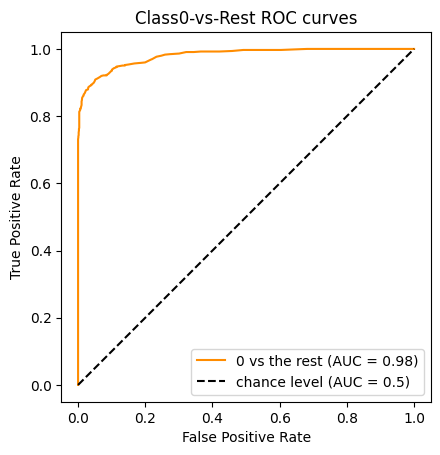

In [155]:
from sklearn.metrics import RocCurveDisplay

y_score = rfr.fit(list(X_train['Morgan2FP']), y_train).predict_proba(list(X_test['Morgan2FP']))

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Class{class_of_interest}-vs-Rest ROC curves")
plt.legend()
plt.show()